<a href="https://colab.research.google.com/github/nervewastaken/stock-analysis/blob/main/NASDAQstockanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
AAPL_data_path = "/content/drive/MyDrive/datasets/NASDAQ/AAPL.csv"
data = pd.read_csv(AAPL_data_path )
data = data.drop('ticker',axis=1)


print(data.columns)
print(data.head())

Index(['date', 'open', 'high', 'low', 'close'], dtype='object')
         date  open  high   low  close
0  1980-12-12  0.13  0.13  0.13   0.13
1  1980-12-15  0.12  0.12  0.12   0.12
2  1980-12-16  0.11  0.11  0.11   0.11
3  1980-12-17  0.12  0.12  0.12   0.12
4  1980-12-18  0.12  0.12  0.12   0.12


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
AAPL_data_path = "/content/drive/MyDrive/datasets/NASDAQ/AAPL.csv"
data = pd.read_csv(AAPL_data_path)
data = data.drop('ticker',axis=1)

# Ensure 'date' is a datetime type
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Create lag features
for lag in range(1, 4):  # Create 3 lag features
    data[f'close_lag_{lag}'] = data['close'].shift(lag)

# Drop rows with NaN values
data.dropna(inplace=True)

# Define features and target
X = data.drop('close', axis=1)
y = data['close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Optional: Display predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


Mean Squared Error (MSE): 0.36
                Actual   Predicted
date                              
2000-09-06    0.889686    0.921150
1999-08-05    0.416779    0.405820
2018-04-17   42.548200   42.218240
2013-10-11   15.425900   15.329480
2022-04-12  166.901000  166.505800
...                ...         ...
1986-03-05    0.095908    0.094011
1992-07-20    0.340611    0.341067
2004-06-25    0.512736    0.504465
2008-05-28    5.693140    5.651640
2002-10-07    0.209382    0.213417

[2193 rows x 2 columns]


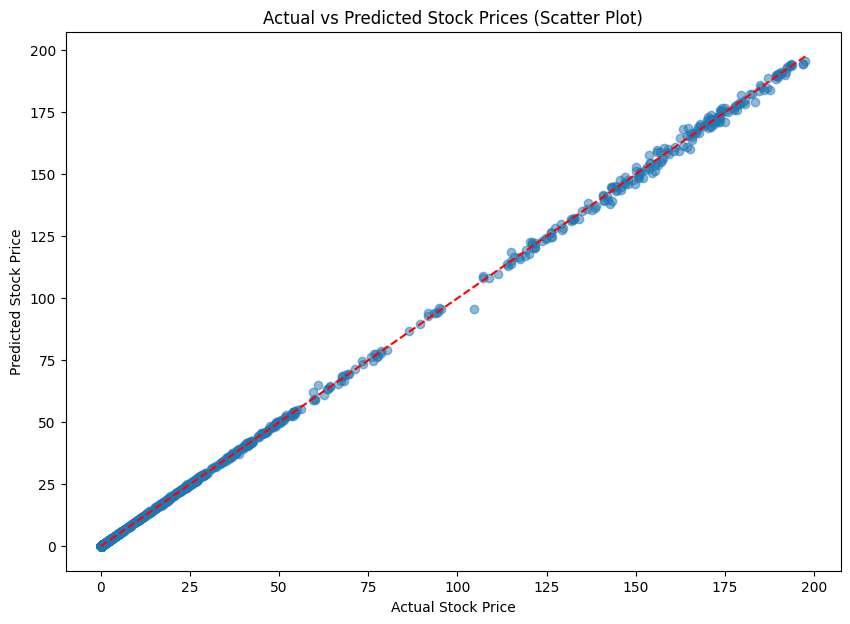

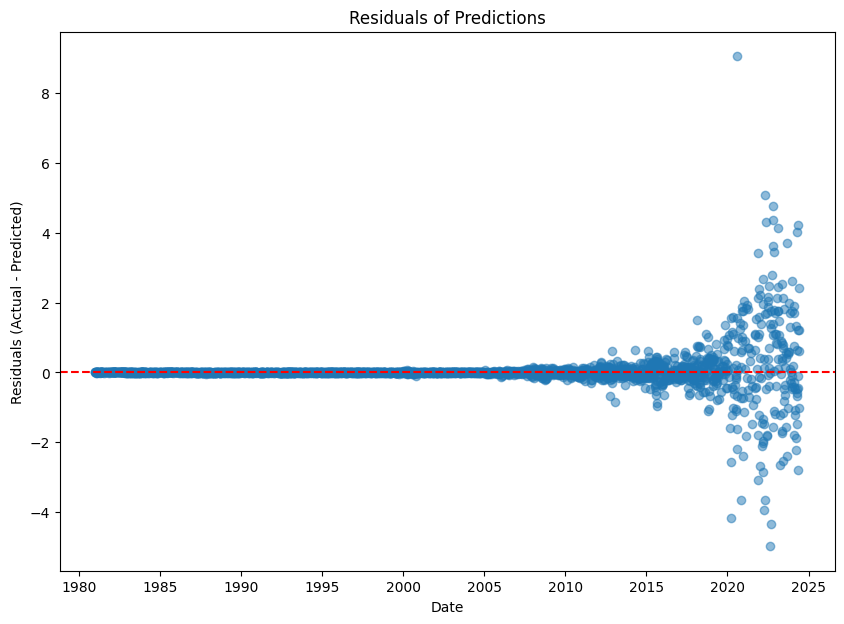

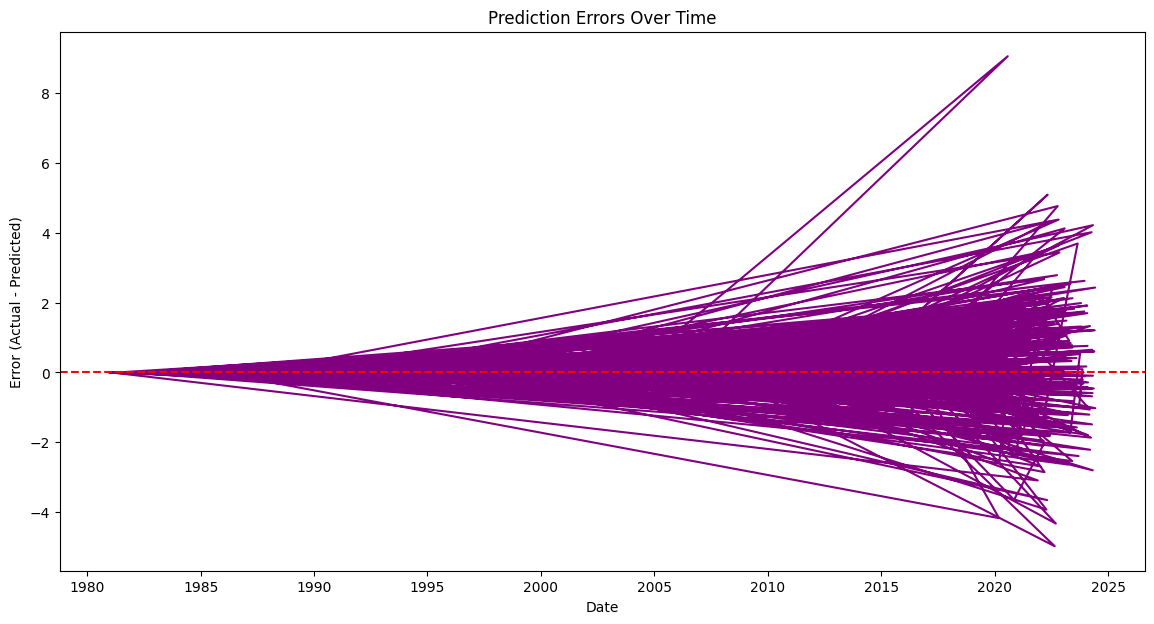

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.5)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices (Scatter Plot)')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.show()


plt.figure(figsize=(10, 7))
plt.scatter(results.index, results['Actual'] - results['Predicted'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Date')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


errors = results['Actual'] - results['Predicted']

plt.figure(figsize=(14, 7))
plt.plot(results.index, errors, color='purple')
plt.title('Prediction Errors Over Time')
plt.xlabel('Date')
plt.ylabel('Error (Actual - Predicted)')
plt.axhline(0, color='red', linestyle='--')
plt.show()



#Gradient Boosting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Load the dataset
AAPL_data_path = "/content/drive/MyDrive/datasets/NASDAQ/AAPL.csv"
data = pd.read_csv(AAPL_data_path)
data = data.drop('ticker',axis=1)

# Ensure 'date' is a datetime type
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Create lag features
for lag in range(1, 4):  # Create 3 lag features
    data[f'close_lag_{lag}'] = data['close'].shift(lag)

# Drop rows with NaN values
data.dropna(inplace=True)

# Define features and target
X = data.drop('close', axis=1)

y = data['close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


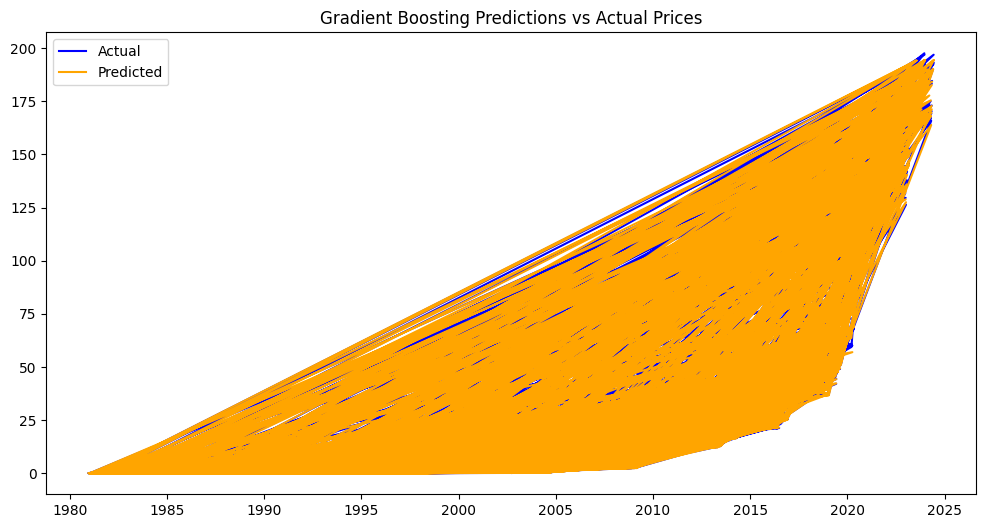

Mean Squared Error (MSE): 0.62


In [ ]:
# Train the model
model = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title('Gradient Boosting Predictions vs Actual Prices')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')



#Random Forest - AAPL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
AAPL_data_path = "/content/drive/MyDrive/datasets/NASDAQ/AAPL.csv"
data = pd.read_csv(AAPL_data_path)
data['date'] = pd.to_datetime(data['date'])
data.drop('ticker',axis=1)
data.set_index('date', inplace=True)

# Drop non-numeric columns if any
data = data.select_dtypes(include=[np.number])

# Create lag features
for lag in range(1, 4):  # Create 3 lag features
    data[f'close_lag_{lag}'] = data['close'].shift(lag)

# Drop rows with NaN values
data.dropna(inplace=True)

# Define features and target
X = data.drop('close', axis=1)
y = data['close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=150, random_state=50)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=150, random_state=50)

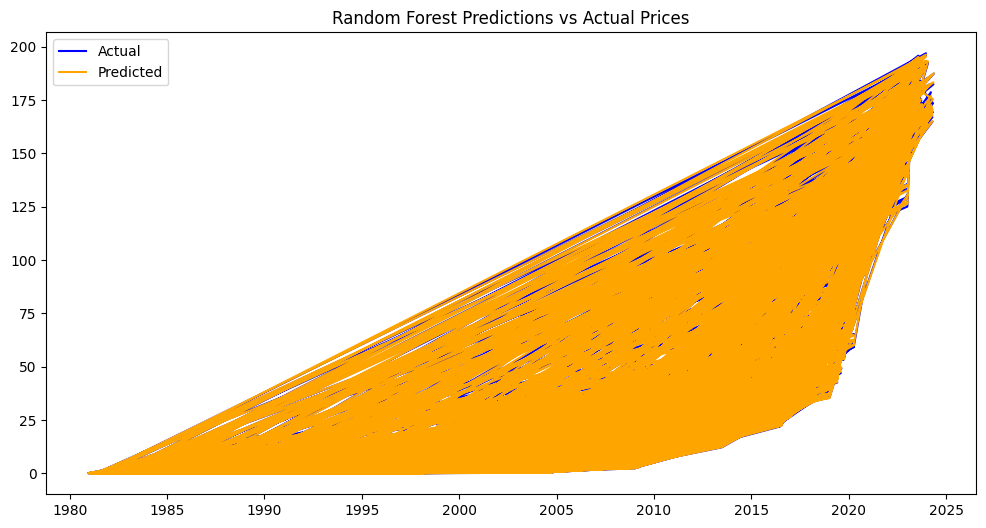

Mean Squared Error (MSE): 0.16


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title('Random Forest Predictions vs Actual Prices')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')



#Random Forest - more companies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data_path = "/content/drive/MyDrive/datasets/NASDAQ/TSLA.csv"
data = pd.read_csv(data_path)
data['date'] = pd.to_datetime(data['date'])
data.drop('ticker',axis=1)
data.set_index('date', inplace=True)

# Drop non-numeric columns if any
data = data.select_dtypes(include=[np.number])

# Create lag features
for lag in range(1, 4):  # Create 3 lag features
    data[f'close_lag_{lag}'] = data['close'].shift(lag)

# Drop rows with NaN values
data.dropna(inplace=True)

# Define features and target
X = data.drop('close', axis=1)
y = data['close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=150, random_state=50)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=50)

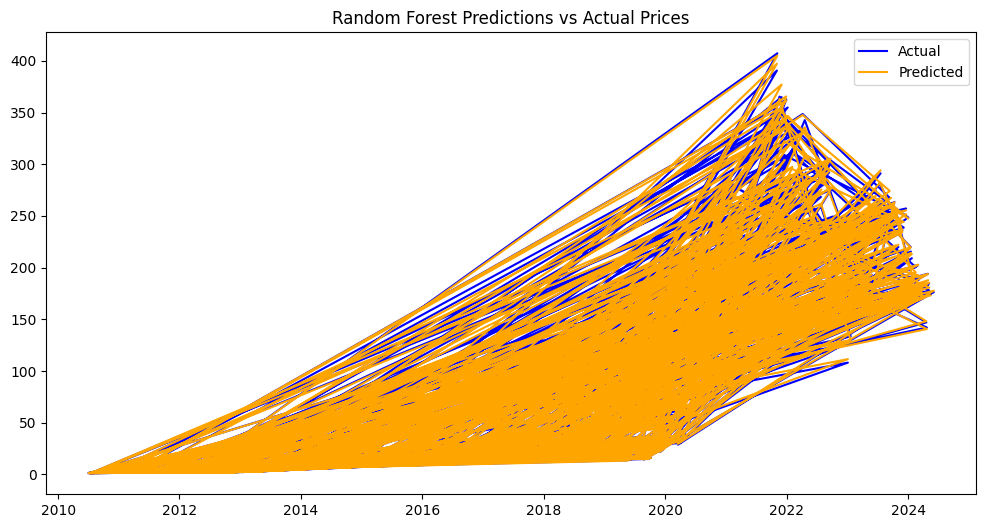

Mean Squared Error (MSE): 7.47


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title('Random Forest Predictions vs Actual Prices')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')